In [5]:
"""
Import core Python libraries and configure global settings.
Purpose:
- Bring in standard libraries for data analysis (pandas, numpy),
  visualization (matplotlib, seaborn).
- Adjust pandas display options so we can see all columns and wide
  DataFrames without wrapping (important for exploring movies dataset).
- Set a consistent seaborn theme for all plots, making figures easier to
  read in the final presentation.
"""

# Data manipulation and analysis
import pandas as pd
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Pandas display settings:
# - Show all columns in wide datasets
# - Prevent line wrapping when printing DataFrames
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)        

# Seaborn theme:
# Use "whitegrid" for clear background gridlines, improving readability
# of bar charts, line charts, and heatmaps in later cells.
sns.set_theme(style="whitegrid")

In [6]:
"""
Load raw movie datasets into pandas DataFrames.

Purpose:
- Read in the two main CSV files from the Kaggle "Movies Dataset":
  1) movies_metadata.csv -> contains details about each movie (title,
     genres, release date, budget, revenue, etc.)
  2) ratings.csv -> contains user ratings for movies (userId, movieId,
     rating, timestamp)

Inputs:
- ../data/movies_metadata.csv
- ../data/ratings.csv

Outputs:
- movies: DataFrame holding ~45,000 movies with metadata
- ratings: DataFrame holding ~26 million rows of user ratings

Notes:
- low_memory=False ensures pandas reads the file in a single pass to
  correctly infer data types (avoids mixed-type warnings at runtime).
- These raw DataFrames will be cleaned and transformed in later cells.
"""

# Load movies metadata
movies = pd.read_csv("../data/movies_metadata.csv", low_memory=False)

# Load user ratings
ratings = pd.read_csv("../data/ratings.csv")

In [7]:
"""
Check library versions and confirm dataset dimensions.

Purpose:
- Print the versions of core libraries (pandas, numpy, matplotlib, seaborn)
  to document the environment. This ensures reproducibility and makes it
  easier for others to run the notebook in the same setup.
- Print the shape (rows, columns) of the two loaded DataFrames
  (movies, ratings) to verify successful data import and get a first sense
  of dataset size.

Inputs:
- movies (DataFrame loaded from movies_metadata.csv)
- ratings (DataFrame loaded from ratings.csv)

Outputs:
- Console output showing library versions.
- Console output showing dataset dimensions:
    * Movies: ~45,000 rows × ~24 columns
    * Ratings: ~26 million rows × 4 columns
"""

# Import matplotlib base module (used for checking version)
import matplotlib as mpl

# Print versions of analysis libraries
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", mpl.__version__)
print("seaborn:", sns.__version__)

# Print dataset dimensions (rows, columns) to confirm load
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

pandas: 2.2.3
numpy: 2.2.4
matplotlib: 3.10.1
seaborn: 0.13.2
Movies shape: (45466, 24)
Ratings shape: (26024289, 4)


In [8]:
"""
Inspect the structure of the movies DataFrame.

Purpose:
- Use pandas .info() to quickly examine:
  * Number of rows and columns
  * Column names and data types
  * Non-null counts (helps identify missing data)
  * Memory usage

Inputs:
- movies (DataFrame with raw movie metadata)

Outputs:
- Console summary of DataFrame structure, showing:
  * Each column name
  * Count of non-null values
  * Data type (object, float, int, etc.)
  * Overall row/column count
  * Approximate memory footprint

Notes:
- This is an early diagnostic step to understand the raw dataset.
- Useful for spotting:
  * Columns stored as object that should be numeric
  * Columns with heavy missingness
  * Extremely wide memory usage (important for large files)
"""

# Summarize structure and data types of movies DataFrame
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [9]:
"""
Inspect the structure of the ratings DataFrame.

Purpose:
- Use pandas .info() to examine the ratings dataset at a high level:
  * Number of rows and columns
  * Column names and inferred data types
  * Non-null counts (check for missing values)
  * Memory usage

Inputs:
- ratings (DataFrame with user rating data)

Outputs:
- Console summary of DataFrame structure, showing:
  * Four expected columns: userId, movieId, rating, timestamp
  * Row count (~26 million, very large compared to movies dataset)
  * Data types (userId/movieId = int, rating = float, timestamp = int)

Notes:
- This confirms ratings is a very large dataset — important for performance considerations.
- Also allows checking if any unexpected nulls exist (typically ratings should be complete).
- Timestamp is stored as integer (UNIX format); may need conversion to datetime later.
"""

# Summarize structure and data types of ratings DataFrame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [10]:
"""
Preview the first five rows of the movies DataFrame.

Purpose:
- Quickly inspect actual values in the movies dataset to understand:
  * Column names and ordering
  * Example values (titles, release dates, genres, budget, revenue, etc.)
  * Formatting issues (e.g., budget stored as strings, missing release dates)
  * Presence of nested JSON-like strings in some fields (e.g., genres)

Inputs:
- movies (DataFrame with raw movie metadata)

Outputs:
- Tabular display of the first five rows of movies, showing sample records.

Notes:
- This is an exploratory diagnostic step.
- Complements movies.info() by showing real data values, not just types.
- Immediately highlights data quality issues (e.g., budget='0', release_date missing).
"""

# Display the first five rows of the movies DataFrame
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
"""
Preview the first five rows of the ratings DataFrame.

Purpose:
- Inspect example values to confirm the structure of the ratings dataset:
  * userId: unique identifier for each user
  * movieId: foreign key linking to movies DataFrame
  * rating: numeric score (likely on a 0.5–5.0 scale)
  * timestamp: when the rating was left (UNIX format, integer)

Inputs:
- ratings (DataFrame with user rating data)

Outputs:
- Tabular display of the first five rows of ratings, showing userId,
  movieId, rating, and timestamp.

Notes:
- Validates that all expected columns are present.
- Confirms no obvious missing values in this preview.
- Timestamp conversion to datetime may be needed for temporal analysis.
"""

# Display the first five rows of the ratings DataFrame
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [12]:
"""
Check missing values in the movies DataFrame.

Purpose:
- Identify which columns in movies contain missing values and how severe
  the issue is.
- Create a summary table with:
    * Missing Count: total number of nulls per column
    * Missing %: percentage of nulls relative to total rows
- Sort columns by highest missing count for easy inspection.

Inputs:
- movies (DataFrame with raw movie metadata)

Outputs:
- missing_movies: DataFrame showing missing value counts and percentages
  for each column, sorted descending by missing count.

Notes:
- This is a standard EDA step to prioritize cleaning tasks.
- Columns with very high missing % may be dropped or require imputation.
"""

# Build a summary table of missing values per column
missing_movies = pd.DataFrame({
    'Missing Count': movies.isnull().sum(),
    'Missing %': (movies.isnull().sum() / len(movies)) * 100
}).sort_values(by='Missing Count', ascending=False)

# Display missingness table
missing_movies

,Missing Count,Missing %
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
status,87,0.191352
release_date,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


In [13]:
"""
Check missing values in the ratings DataFrame.

Purpose:
- Identify whether any columns in ratings contain missing values.
- Create a summary table with:
    * Missing Count: number of nulls in each column
    * Missing %: percentage of nulls relative to dataset size
- Sort columns by missing count (though with only 4 columns, it's simple).

Inputs:
- ratings (DataFrame with user rating data)

Outputs:
- missing_ratings: DataFrame summarizing missing values for each column.
  Expectation: no missing values in a ratings dataset.

Notes:
- Ratings datasets are usually complete, since each row represents an
  explicit user rating. Missingness here would indicate data corruption.
"""

# Build a summary table of missing values per column in ratings
missing_ratings = pd.DataFrame({
    'Missing Count': ratings.isnull().sum(),
    'Missing %': (ratings.isnull().sum() / len(ratings)) * 100
}).sort_values(by='Missing Count', ascending=False)

# Display missingness table
missing_ratings

,Missing Count,Missing %
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


In [14]:
"""
Convert ratings timestamp from UNIX to datetime and validate.

Purpose:
- Transform the raw integer `timestamp` column (UNIX seconds since epoch)
  into a pandas datetime format for easier temporal analysis.
- Use errors='coerce' to safely handle any invalid values (they become NaT).
- Check how many values became NaT after conversion.
- Print the min and max timestamps to understand dataset coverage period.
- Call .info() again to confirm the dtype of `timestamp` has changed.

Inputs:
- ratings DataFrame (with raw integer `timestamp` column)

Outputs:
- ratings DataFrame updated: `timestamp` column now dtype datetime64[ns].
- Console output:
    * Count of NaT values created during conversion
    * Earliest and latest rating dates
    * DataFrame info summary with updated dtype

Notes:
- Converting to datetime is essential for time-based trend analysis
  (e.g., ratings over decades, monthly/annual activity).
- Min/max range provides sanity check that data aligns with movie release years.
"""

# Convert UNIX timestamp (seconds since epoch) to pandas datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s', errors='coerce')

# Check how many invalid values were converted to NaT (Not a Time)
print("NaT after conversion:", ratings['timestamp'].isna().sum())

# Print earliest and latest rating dates
print("timestamp range:", ratings['timestamp'].min(), "→", ratings['timestamp'].max())

# Confirm dtype change and overall structure of ratings DataFrame
ratings.info()

NaT after conversion: 0
timestamp range: 1995-01-09 11:46:44 → 2017-08-04 06:57:50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 794.2 MB


In [15]:
"""
Normalize boolean-like columns in the movies DataFrame.

Purpose:
- Some columns (e.g., "adult", "video") are stored as strings like "True"/"False",
  "0"/"1", "yes"/"no", etc. We want to standardize them to actual Boolean dtype.
- Define a helper function `to_bool` that:
    * Casts values to string
    * Normalizes (strip + lowercase)
    * Maps common truthy/falsey strings to True/False
- Apply this function to "adult" and "video" columns.
- Convert final results to pandas 'boolean' dtype (nullable Boolean type).
- Print dtypes and value counts to verify conversion.

Inputs:
- movies["adult"], movies["video"] (string/object columns with mixed encodings)

Outputs:
- Updated movies DataFrame with:
    * movies["adult"]: boolean dtype (True/False/NA)
    * movies["video"]: boolean dtype (True/False/NA)
- Console output showing:
    * New dtypes for these columns
    * Value counts including missing values

Notes:
- This improves data consistency and makes downstream filtering easier.
- Using pandas 'boolean' (vs. Python bool) allows missing values (NA).
"""

def to_bool(s: pd.Series) -> pd.Series:

    # Normalize to lowercase strings with no leading/trailing spaces
    norm = s.astype("string").str.strip().str.lower()

    # Map common truthy/falsey representations to actual booleans
    mapped = norm.map({
        "true": True,  "false": False,
        "1": True,     "0": False,
        "t": True,     "f": False,
        "yes": True,   "no": False
    })
    return mapped

# Apply normalization to 'adult' and 'video' columns
for col in ["adult", "video"]:
    movies[col] = to_bool(movies[col]).astype("boolean")

# Confirm dtypes are now Boolean
print(movies[["adult", "video"]].dtypes)

# Display distribution of values for sanity check
print("\nValue counts (adult):")
print(movies["adult"].value_counts(dropna=False))
print("\nValue counts (video):")
print(movies["video"].value_counts(dropna=False))

adult    boolean
video    boolean
dtype: object

Value counts (adult):
adult
False    45454
True         9
<NA>         3
Name: count, dtype: Int64

Value counts (video):
video
False    45367
True        93
<NA>         6
Name: count, dtype: Int64


In [16]:
"""
Check for missing values in the cleaned 'adult' and 'video' columns.

Purpose:
- After converting these columns to boolean dtype, confirm if any rows
  are still NA (missing/invalid).
- Count and preview the rows with NA values for each column.
- Display key identifiers (id, title, column) to understand which movies
  are affected.

Inputs:
- movies['adult'], movies['video'] (boolean columns after cleaning)

Outputs:
- Console output: number of NA rows in 'adult' and 'video'
- DataFrame preview (first 10 rows) of movies with NA values in each column

Notes:
- Important QA step: ensures conversion function didn’t silently drop info.
- Some NA values may be due to malformed or unexpected original entries.
"""

# Identify rows where 'adult' is missing
adult_na = movies[movies['adult'].isna()]
print("Adult NA rows:", len(adult_na))
display(adult_na[['id', 'title', 'adult']].head(10))  

# Identify rows where 'video' is missing
video_na = movies[movies['video'].isna()]
print("Video NA rows:", len(video_na))
display(video_na[['id', 'title', 'video']].head(10))

Adult NA rows: 3


,id,title,adult
19730,1997-08-20,NaN,<NA>
29503,2012-09-29,NaN,<NA>
35587,2014-01-01,NaN,<NA>


Video NA rows: 6


,id,title,video
19729,82663,NaN,<NA>
19730,1997-08-20,NaN,<NA>
29502,122662,NaN,<NA>
29503,2012-09-29,NaN,<NA>
35586,249260,NaN,<NA>
35587,2014-01-01,NaN,<NA>


In [17]:
"""
Convert key columns in movies DataFrame to correct numeric/datetime types.

Purpose:
- Raw CSV stores many fields as strings; convert them to proper types for analysis:
    * id          -> numeric (unique movie identifier)
    * budget      -> numeric (int, currency in dollars)
    * popularity  -> numeric (float, popularity score)
    * release_date -> datetime (parseable calendar date)
- Derive a new column 'year' from release_date for temporal grouping.

Error handling:
- Use errors='coerce' so any invalid/malformed values become NaN (instead of raising errors).

Validation steps:
- Print dtypes to confirm successful conversions.
- Count NaNs introduced by coercion to see how much data was lost.
- Preview a few rows with bad 'id' and bad 'release_date' to understand source of issues.

Inputs:
- movies DataFrame (raw object/string types for many columns)

Outputs:
- Updated DataFrame with corrected dtypes.
- Console output:
    * Data types of converted columns
    * Number of NaNs introduced
    * Sample problematic rows for manual inspection

Notes:
- Coercion is a pragmatic approach for large messy datasets.
- Introduced NaNs highlight data quality issues to be addressed later.
- Year extraction enables trend analysis by release year.
"""

# Convert id, budget, popularity from string/object → numeric (coerce invalid to NaN)
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

# Convert release_date to datetime (coerce invalid/missing to NaT)
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Derive release year for trend analysis
movies['year'] = movies['release_date'].dt.year

# Confirm new dtypes
print("Dtypes after conversion:")
print(movies[['id','budget','popularity','release_date','year']].dtypes)

# Check how many NaNs were introduced during coercion
print("\nNew NaNs introduced by coercion:")
print(movies[['id','budget','popularity','release_date']].isna().sum().sort_values(ascending=False))

# Inspect a few problematic rows
bad_id = movies[movies['id'].isna()][['title','id','release_date']].head(5)
bad_rdate = movies[movies['release_date'].isna()][['title','id','release_date']].head(5)
print("\nSample bad id rows:\n", bad_id)
print("\nSample bad release_date rows:\n", bad_rdate)


Dtypes after conversion:
id                     float64
budget                 float64
popularity             float64
release_date    datetime64[ns]
year                   float64
dtype: object

New NaNs introduced by coercion:
release_date    90
popularity       6
budget           3
id               3
dtype: int64

Sample bad id rows:
       title  id release_date
19730   NaN NaN          NaT
29503   NaN NaN          NaT
35587   NaN NaN          NaT

Sample bad release_date rows:
                                      title        id release_date
711   War Stories Our Mother Never Told Us  365371.0          NaT
734                  Vermont Is for Lovers  215107.0          NaT
3460            Jails, Hospitals & Hip-Hop   94214.0          NaT
3628                        Boricua's Bond  207731.0          NaT
5879                   Divine Intervention   99885.0          NaT


In [18]:
"""
Check missing values specifically for critical analysis columns.

Purpose:
- Focus on columns essential for movie trend analysis and presentations:
    * id, title, release_date, year
    * budget, revenue, popularity
    * runtime, vote_average, vote_count
    * adult, video
- Build a summary DataFrame with:
    * Missing Count: number of NaNs per column
    * Missing %: percentage of total rows missing
    * Dtype: current data type of each column
- Sort results by highest missing count.

Inputs:
- movies DataFrame
- Subset of critical columns defined in critical_cols list

Outputs:
- missing_summary DataFrame:
    * Shows completeness and dtypes of each key column

Notes:
- This step prioritizes which fields must be cleaned/imputed vs. which can
  tolerate missingness.
- Titles and IDs should have no missing values — if they do, those rows
  may be unusable.
"""

# Define the columns that are most important for analysis
critical_cols = [
    'id', 'title', 'release_date', 'year', 
    'budget', 'revenue', 'popularity', 
    'runtime', 'vote_average', 'vote_count', 
    'adult', 'video'
]

# Summarize missingness and dtypes for these key columns
missing_summary = pd.DataFrame({
    "Missing Count": movies[critical_cols].isna().sum(),
    "Missing %": (movies[critical_cols].isna().sum() / len(movies)) * 100,
    "Dtype": movies[critical_cols].dtypes
}).sort_values(by="Missing Count", ascending=False)

# Display missing value summary
missing_summary

,Missing Count,Missing %,Dtype
runtime,263,0.578454,float64
year,90,0.197950,float64
release_date,90,0.197950,datetime64[ns]
title,6,0.013197,object
video,6,0.013197,boolean
revenue,6,0.013197,float64
popularity,6,0.013197,float64
vote_average,6,0.013197,float64
vote_count,6,0.013197,float64
id,3,0.006598,float64


In [19]:
"""
Filter and clean movies DataFrame.

Purpose:
1. Drop rows missing critical identifiers:
   - 'id': needed for joins with ratings
   - 'title': required for presentation
   - 'release_date': required for time-based trends
2. Restrict dataset to plausible release years (1900–2022) to remove
   invalid/erroneous records (e.g., placeholder years, far-future entries).
3. Create a clean copy (movies_clean) to preserve original movies DataFrame.

Inputs:
- movies DataFrame (raw, with missing/invalid values)

Outputs:
- movies_clean DataFrame:
    * No missing id/title/release_date
    * Release years restricted to [1900, 2022]
- Console output:
    * Row counts before and after cleaning

Notes:
- Dropping rows ensures core fields are always available for analysis.
- Year filter prevents outliers from skewing trends.
"""

# Drop rows missing ID, title, or release date
movies_clean = movies.dropna(subset=['id', 'title', 'release_date']).copy()

# Keep only movies with release year in a reasonable range
movies_clean = movies_clean[(movies_clean['year'] >= 1900) & (movies_clean['year'] <= 2022)]

# Compare dataset sizes before and after cleaning
print("Movies rows before:", len(movies))
print("Movies rows after :", len(movies_clean))

Movies rows before: 45466
Movies rows after : 45295


In [20]:
"""
Verify no missing values remain in key identifier/date columns.

Purpose:
- Double-check that after cleaning, all rows in movies_clean have:
    * id (numeric identifier)
    * title (movie name)
    * release_date (datetime)
- Ensures the dataset is valid for merging, grouping, and presentation.

Inputs:
- movies_clean DataFrame (already filtered for non-missing id/title/release_date)

Outputs:
- Console output of null counts for these three columns (expected = 0)

Notes:
- This is a QA validation step, confirming the cleaning logic worked as intended.
- Guarantees that analyses relying on IDs, titles, or release dates won’t break.
"""

# Confirm that no nulls remain in key columns after cleaning
movies_clean[['id','title','release_date']].isna().sum()

id              0
title           0
release_date    0
dtype: int64

In [21]:
"""
Compare original vs. cleaned movies DataFrame and inspect column names.

Purpose:
- Print shapes of raw movies vs. cleaned movies_clean to quantify data
  reduction after filtering.
- Display the full list of column names in movies_clean to confirm which
  fields are available for analysis.

Inputs:
- movies (raw DataFrame)
- movies_clean (filtered DataFrame)

Outputs:
- Console output:
    * Shape of movies (rows × columns)
    * Shape of movies_clean (rows × columns)
    * List of all column names in movies_clean

Notes:
- This provides a quick sanity check on how much data was lost during
  cleaning (rows dropped, columns preserved).
- Columns inspection helps plan the next steps in EDA (which variables to use).
"""

# Print original dataset shape
print(movies.shape)        

# Print cleaned dataset shape
print(movies_clean.shape)  

# Display list of all columns available in the cleaned dataset
movies_clean.columns       

(45466, 25)
(45295, 25)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'year'],
      dtype='object')

In [22]:
"""
Feature engineering: add profitability metrics, temporal grouping, and parsed genres.

Purpose:
1. Profitability:
   - profit = revenue − budget
   - roi (return on investment) = revenue / budget
     * Replace budget=0 with NaN to avoid divide-by-zero errors.
2. Time grouping:
   - decade = floor(year/10)*10 (e.g., 1994 → 1990s)
     * Stored as pandas Int64 (nullable integer type).
3. Genre parsing:
   - 'genres' column is a stringified JSON list (e.g., "[{'id': 18, 'name': 'Drama'}]")
   - Define parse_genres function:
       * Handle NaN and empty lists safely
       * Use ast.literal_eval to safely parse string → Python list/dict
       * Extract 'name' field from each genre dict
   - Apply to movies_clean['genres'] to create a clean list of genre names.

Inputs:
- movies_clean DataFrame (with numeric budget/revenue/year already cleaned)

Outputs:
- New columns added to movies_clean:
    * profit (float)
    * roi (float, may contain NaN for budget=0 or missing revenue)
    * decade (Int64)
    * genres_list (list of genre strings)
- Preview of selected fields for first 5 rows

Notes:
- These engineered features enable trend analysis by profitability, ROI, decade, and genre.
- Parsing genres into lists makes it easier to "explode" genres later for counts/heatmaps.
"""

# use ast.literal_eval to safely parse stringified genre lists
import ast  

# Profitability metrics
movies_clean['profit'] = movies_clean['revenue'] - movies_clean['budget']
movies_clean['roi'] = movies_clean['revenue'] / movies_clean['budget'].replace(0, np.nan)

# Group years into decades
movies_clean['decade'] = (movies_clean['year'] // 10 * 10).astype('Int64')

# Helper to parse genres JSON string into a list of genre names
def parse_genres(x):
    try:
        if pd.isna(x) or x == '[]':
            return []
        data = ast.literal_eval(x)
        return [d.get('name') for d in data if isinstance(d, dict) and 'name' in d]
    except Exception:
        return []

# Apply parsing to create genres_list column
movies_clean['genres_list'] = movies_clean['genres'].apply(parse_genres)

# Preview engineered columns
movies_clean[['title','year','decade','genres_list','budget','revenue','profit','roi']].head(5)

,title,year,decade,genres_list,budget,revenue,profit,roi
0,Toy Story,1995.0,1990,"[Animation, Comedy, Family]",30000000.0,373554033.0,343554033.0,12.451801
1,Jumanji,1995.0,1990,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,197797249.0,4.043035
2,Grumpier Old Men,1995.0,1990,"[Romance, Comedy]",0.0,0.0,0.0,NaN
3,Waiting to Exhale,1995.0,1990,"[Comedy, Drama, Romance]",16000000.0,81452156.0,65452156.0,5.090760
4,Father of the Bride Part II,1995.0,1990,[Comedy],0.0,76578911.0,76578911.0,NaN


In [23]:
"""
Ensure 'year' column uses a consistent integer type and preview results.

Purpose:
- Convert 'year' to pandas nullable integer type (Int64).
  * Avoids float dtype and allows missing values if any.
- Sanity check: preview first 5 rows with title, year, and decade
  to confirm consistency of temporal fields.

Inputs:
- movies_clean DataFrame (with derived 'year' and 'decade')

Outputs:
- Updated movies_clean['year'] as Int64
- Preview of first 5 rows: title, year, decade

Notes:
- Using Int64 (nullable int) is safer than int64 because it supports NA.
- Quick preview ensures year and decade align (e.g., 1994 → 1990s).
"""

# Convert year to nullable integer type
movies_clean['year'] = movies_clean['year'].astype('Int64')

# Preview year and decade alongside title
movies_clean[['title','year','decade']].head(5)

,title,year,decade
0,Toy Story,1995,1990
1,Jumanji,1995,1990
2,Grumpier Old Men,1995,1990
3,Waiting to Exhale,1995,1990
4,Father of the Bride Part II,1995,1990


In [24]:
"""
Check prevalence of zero values in budget and revenue.

Purpose:
- Identify how many movies report budget=0 and/or revenue=0.
- These zeros usually mean "unknown/missing" rather than truly zero,
  which can distort profit/ROI calculations.
- Quantify counts and percentages relative to total dataset size.

Inputs:
- movies_clean['budget'], movies_clean['revenue']

Outputs:
- Console output:
    * Total number of movies
    * Count + % with budget = 0
    * Count + % with revenue = 0
    * Count + % with both = 0

Notes:
- This helps decide whether to filter out or adjust these rows
  for financial analyses.
"""

# Count movies with zero budget, zero revenue, and both zero
budget_zero = (movies_clean['budget'] == 0).sum()
revenue_zero = (movies_clean['revenue'] == 0).sum()
both_zero = ((movies_clean['budget'] == 0) & (movies_clean['revenue'] == 0)).sum()

# Total movies in cleaned dataset
total_movies = len(movies_clean)

# Print results with percentages
print("Total movies:", total_movies)
print(f"Movies with budget = 0   : {budget_zero} ({budget_zero/total_movies:.2%})")
print(f"Movies with revenue = 0  : {revenue_zero} ({revenue_zero/total_movies:.2%})")
print(f"Movies with both = 0     : {both_zero} ({both_zero/total_movies:.2%})")

Total movies: 45295
Movies with budget = 0   : 36409 (80.38%)
Movies with revenue = 0  : 37888 (83.65%)
Movies with both = 0     : 34383 (75.91%)


In [25]:
"""
Load and clean links dataset (MovieLens → TMDB mapping).

Purpose:
- Read in links.csv, which provides mapping between MovieLens movieId,
  IMDb IDs, and TMDB IDs.
- Convert IDs (movieId, tmdbId) to numeric types with coercion to handle bad rows.
- Drop rows missing tmdbId (since it's required for joining with movies metadata).
- Drop duplicate movieId entries, keeping only the first occurrence.
- Summarize dataset size before/after cleaning, and key counts.

Inputs:
- links.csv (raw mapping file)

Outputs:
- links_clean DataFrame:
    * Only valid rows with tmdbId present
    * One-to-one mapping of movieId → tmdbId
- Console output:
    * Shape of raw vs. cleaned dataset
    * Number of null tmdbId values (dropped)
    * Unique counts of movieId and tmdbId

Notes:
- Ensures a reliable bridge between MovieLens ratings (movieId) and
  metadata from TMDB (id).
- Dropping duplicates avoids ambiguity in joins.
"""

# Load links dataset (MovieLens IDs to external IDs)
links = pd.read_csv("../data/links.csv")

# Convert IDs to numeric, coercing invalid values to NaN
links['movieId'] = pd.to_numeric(links['movieId'], errors='coerce')
links['tmdbId']  = pd.to_numeric(links['tmdbId'],  errors='coerce')

# Keep only rows with valid tmdbId
links_clean = links.dropna(subset=['tmdbId']).copy()

# Drop duplicate movieId rows, keep first occurrence
links_clean = links_clean.drop_duplicates(subset=['movieId'], keep='first')

# Summary checks
print("links shape        :", links.shape)
print("links_clean shape  :", links_clean.shape)
print("Null tmdbId (raw)  :", links['tmdbId'].isna().sum())
print("Unique movieId     :", links_clean['movieId'].nunique())
print("Unique tmdbId      :", links_clean['tmdbId'].nunique())

links shape        : (45843, 3)
links_clean shape  : (45624, 3)
Null tmdbId (raw)  : 219
Unique movieId     : 45624
Unique tmdbId      : 45594


In [26]:
"""
Merge ratings with TMDB IDs for alignment with movies metadata.

Purpose:
- Use links_clean to map MovieLens movieId → TMDB tmdbId.
- Perform a left join so every rating keeps its movieId, even if no tmdbId match.
- Count how many ratings successfully mapped to a tmdbId.
- Report fraction of ratings with null tmdbId to measure join coverage.
- Print column-level null fractions for clarity.

Inputs:
- ratings DataFrame (user ratings with movieId)
- links_clean DataFrame (mapping of movieId → tmdbId)

Outputs:
- ratings_with_tmdb DataFrame (ratings enriched with tmdbId)
- Console output:
    * Total ratings mapped vs. total ratings (absolute + percentage)
    * Null fraction per join column (movieId, tmdbId)

Notes:
- Mapping tmdbId is essential for merging ratings with TMDB metadata (movies_clean).
- High null fraction would indicate many ratings that cannot be linked.
"""

# Merge ratings with tmdbId from links_clean
ratings_with_tmdb = ratings.merge(
    links_clean[['movieId','tmdbId']],
    on='movieId',
    how='left'         
)

# Count mapped vs total ratings
mapped = ratings_with_tmdb['tmdbId'].notna().sum()
total  = len(ratings_with_tmdb)

print(f"Ratings mapped to a tmdbId: {mapped:,} / {total:,} ({mapped/total:.2%})")

# Show null fractions for join columns
print("\nNull fractions:")
print(ratings_with_tmdb[['movieId','tmdbId']].isna().mean())

Ratings mapped to a tmdbId: 26,010,786 / 26,024,289 (99.95%)

Null fractions:
movieId    0.000000
tmdbId     0.000519
dtype: float64


In [27]:
"""
Aggregate ratings by tmdbId to compute movie-level statistics.

Purpose:
- Collapse raw ratings (many rows per movie) into movie-level aggregates:
    * avg_rating: mean rating across all users
    * num_ratings: count of user ratings
- Drop rows with missing tmdbId before grouping (those movies can't link to metadata).
- Group by tmdbId so results align with movies_clean.

Inputs:
- ratings_with_tmdb (ratings DataFrame with tmdbId joined)

Outputs:
- agg_ratings DataFrame:
    * One row per movie (tmdbId)
    * Columns: tmdbId, avg_rating, num_ratings
- Console output:
    * Count of movies that have at least one rating
    * Preview of first few aggregated rows

Notes:
- avg_rating will be used for quality/performance analysis of movies.
- num_ratings is important to filter out movies with very few votes (unstable averages).
"""

agg_ratings = (
    ratings_with_tmdb                             
      .dropna(subset=['tmdbId'])                  # exclude ratings without TMDB mapping
      .groupby('tmdbId', as_index=False)          # group by movie
      .agg(avg_rating=('rating','mean'),
           num_ratings=('rating','count'))        # compute aggregates
)

# Summary checks
print("Movies with at least one rating:", len(agg_ratings))
agg_ratings.head()

Movies with at least one rating: 44872


,tmdbId,avg_rating,num_ratings
0,2.0,3.673664,262
1,3.0,3.770115,87
2,5.0,3.409031,6090
3,6.0,2.924862,1271
4,11.0,4.132299,77045


In [28]:
"""
Merge movie metadata with aggregated ratings.

Purpose:
- Combine movies_clean (metadata) with agg_ratings (movie-level stats).
- Join on movies_clean['id'] (TMDB id) = agg_ratings['tmdbId'].
- Use left join to preserve all movies, even those without ratings.
- Check coverage: how many movies now have associated avg_rating and num_ratings.

Inputs:
- movies_clean (movie metadata, cleaned)
- agg_ratings (ratings aggregated by tmdbId)

Outputs:
- movies_merged DataFrame:
    * Metadata + ratings stats for each movie
- Console output:
    * Row counts before/after merge (should match since left join)
    * Number and % of movies that have ratings
    * Preview of movies with title, year, avg_rating, num_ratings

Notes:
- Key step linking metadata (budget, genres, release year) to audience data (ratings).
- Movies without ratings will have NaN for avg_rating and num_ratings.
"""

# Merge metadata with ratings aggregates
movies_merged = (
    movies_clean
      .merge(agg_ratings, left_on='id', right_on='tmdbId', how='left')
)

# Confirm dataset size consistency
print("Movies_clean rows:", len(movies_clean))
print("Movies_merged rows:", len(movies_merged))

# Count how many movies actually have ratings
with_ratings = movies_merged['avg_rating'].notna().sum()
print(f"Movies with ratings: {with_ratings} ({with_ratings/len(movies_merged):.2%})")

# Preview a few merged rows
movies_merged[['title','year','avg_rating','num_ratings']].head(10)

Movies_clean rows: 45295
Movies_merged rows: 45295
Movies with ratings: 44575 (98.41%)


,title,year,avg_rating,num_ratings
0,Toy Story,1995,3.888157,66008.0
1,Jumanji,1995,3.236953,26060.0
2,Grumpier Old Men,1995,3.175550,15497.0
3,Waiting to Exhale,1995,2.875713,2981.0
4,Father of the Bride Part II,1995,3.079565,15258.0
5,Heat,1995,3.841764,27895.0
6,Sabrina,1995,3.372105,15157.0
7,Tom and Huck,1995,3.129191,1521.0
8,Sudden Death,1995,3.008365,4423.0
9,GoldenEye,1995,3.431841,32534.0


# Movie Trends — Exploratory Analysis  
**Take-home presentation (5–10 min)**  
_Noah Pettinato_


# Slide 1 — Introduction  

**Goal**  
Understand whether the types of movies that excite audiences have shifted over time, to help optimize scheduling and revenue.  

**Dataset**  
- Source: *Kaggle Movies Dataset* (https://www.kaggle.com/rounakbanik/the-movies-dataset)  
- Files used: `movies_metadata.csv` + `ratings.csv`, joined with `links.csv`.  
- Timeframe: ~1900s through 2010s (2020s excluded due to sparse coverage).  

**Preparation**  
- Cleaned and standardized datatypes.  
- Dropped rows with missing critical fields (`id`, `title`, `release_date`).  
- Extracted `year` and `decade` from release dates.  
- Parsed and exploded `genres` into clean lists.  
- Aggregated per-title ratings (mean rating, number of ratings).  

**Caveats**  
- Budget and revenue are missing for many films (ROI analysis limited).  
- Ratings skew toward popular and recent movies.  
- Dataset coverage is uneven across decades (much richer post-1990s).  

# Slide 2 — Audience Engagement Over Time  

**Question**  
Are audiences rating more movies over time?  

**Method**  
- Group movies by `decade`.  
- Calculate both **average rating** (mean across movies) and **total ratings** (sum of all user ratings).  
- Also track **number of movies released** per decade.  

**Plot**  
- Blue line: average rating by decade.  
- Gray bars (log scale): total number of ratings.  

**Takeaway**  
- Average ratings stay remarkably steady (~3.0–3.3) across decades.  
- Audience engagement (rating volume) has exploded in recent decades, especially post-1990s.  
- The 2020s were excluded due to extremely sparse coverage (only 1 movie in this dataset).  

    decade  avg_rating  total_ratings  num_movies
0     1900    3.017401          954.0          87
1     1910    3.068333         2346.0         176
2     1920    3.262180        38301.0         432
3     1930    3.074740       210011.0        1317
4     1940    3.144699       329937.0        1494
5     1950    3.121988       540516.0        2080
6     1960    3.145451       796276.0        2622
7     1970    3.044075      1376445.0        3472
8     1980    3.024112      3521630.0        3931
9     1990    3.043884     10458564.0        5677
10    2000    3.046612      6801011.0       11207
11    2010    3.054549      1914178.0       12799
12    2020    2.531250           32.0           1


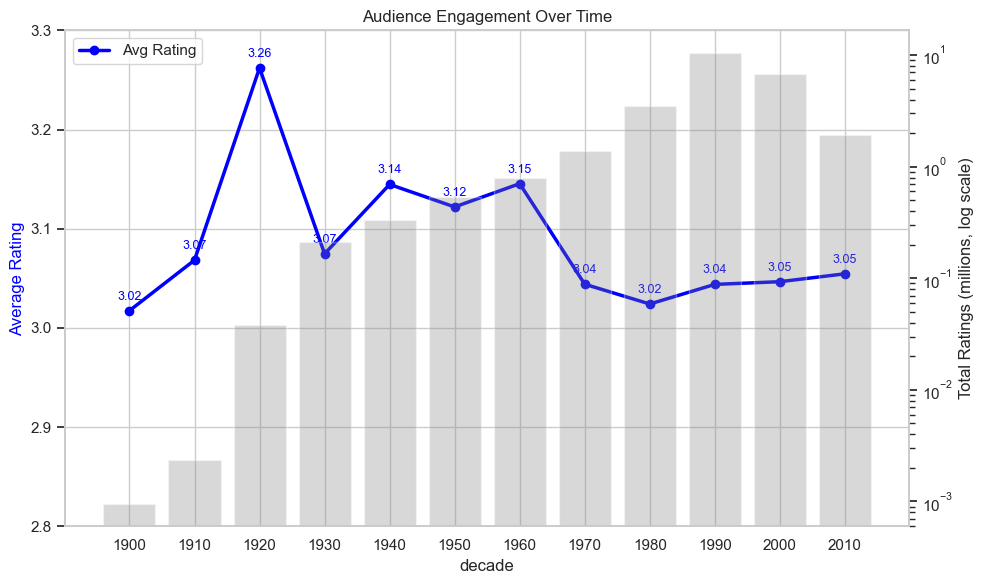

In [29]:
"""
Audience engagement over time: aggregate by decade and visualize.

Purpose:
- Compute decade-level trends from movie-level stats:
  * avg_rating: mean of per-movie averages (proxy for audience quality)
  * total_ratings: sum of num_ratings (proxy for engagement/volume)
  * num_movies: count of movies contributing per decade
- Clean/format for plotting and show both metrics together:
  * Bars (right y-axis, log scale): total_ratings in millions
  * Line (left y-axis): avg_rating with value annotations

Inputs:
- movies_merged (metadata + avg_rating + num_ratings + decade)

Outputs:
- ratings_trend: decade aggregates
- df: plotting frame with string decade labels and totals in millions
- Matplotlib/seaborn chart titled "Audience Engagement Over Time"

Notes:
- Filter decades with very few movies (e.g., <50) to reduce noise.
- Right axis uses log scale to handle large spread in total ratings.
- Current avg_rating is an unweighted mean of per-movie averages.
  With more time, consider a weighted mean by num_ratings.
"""

# Aggregate to decade level (drop rows without decade)
ratings_trend = (
    movies_merged
      .dropna(subset=['decade'])
      .groupby('decade')
      .agg(avg_rating=('avg_rating','mean'),             # unweighted mean of movie-level averages
           total_ratings=('num_ratings','sum'),          # sum of all ratings cast in the decade
           num_movies=('title','count'))                 # number of movies contributing           
      .reset_index()
)

print(ratings_trend)

# Prep for plotting: order by decade, make labels, convert totals to millions
df = (
    ratings_trend
    .sort_values('decade')
    .assign(
        decade_str=lambda d: d['decade'].astype(int).astype(str),
        total_ratings_m=lambda d: d['total_ratings'] / 1e6
    )
)

# Optional stability filter: require at least N movies per decade
df = df[df['num_movies'] >= 50].copy()

# Ensure categorical x ordering matches chronological order
order = df['decade_str'].tolist()
df['decade_str'] = pd.Categorical(df['decade_str'], categories=order, ordered=True)

# Build dual-axis chart
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()

# Bars = engagement proxy (total ratings), plotted on log scale for spread
sns.barplot(
    data=df, x='decade_str', y='total_ratings_m',
    order=order, ax=ax2, color='gray', alpha=0.3
)
ax2.set_ylabel('Total Ratings (millions, log scale)')
ax2.set_yscale('log')
ax2.grid(False)                         # keep only the left-axis grid for clarity

# Line = quality proxy (average rating)
ax1.plot(df['decade_str'], df['avg_rating'],
         marker='o', linewidth=2.5, color='blue', label='Avg Rating', zorder=5)

# Label points with exact average rating
for x, y in zip(df['decade_str'], df['avg_rating']):
    ax1.annotate(f"{y:.2f}", (x, y),
                 xytext=(0, 8), textcoords="offset points",
                 ha="center", fontsize=9, color="blue")

ax1.set_ylabel('Average Rating', color='blue')
ax1.set_ylim(2.8, 3.3)                          # tighten to highlight subtle variation
ax1.patch.set_alpha(0)                          # allow bar gridlines to show through
ax1.set_xlabel('decade')    

plt.title('Audience Engagement Over Time')
ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Takeaway (Slide 2):** Audiences are engaging with way more movies than in the past, but their overall scoring habits haven’t changed.

# Slide 3 — Genre Popularity Over Time

**Question**  
Which genres dominate each decade?

**Method**  
- Exploded `genres_list`, grouped by **decade × genre** to count titles.  
- Computed **share by decade** (genre count / total movies that decade).  
- Focused on the **top 6 genres** overall for readability.  
- Excluded **2020s** due to sparse coverage.

**What to look at**  
- **Heatmap:** darker = larger *share* of releases in that decade (not raw volume).  
- **Table:** top genre per decade (by share).

**Findings (from the chart/table)**  
- **Early decades:** Comedy leads in the 1900s (~53%), then the market shifts strongly to **Drama**.  
- **Drama dominates** most decades (~29–48%), remaining a consistent anchor through the 2010s.  
- **Action/Thriller** gain meaningful share from the 1980s onward (Action ~10–15%, Thriller ~11–15% by 2000s–2010s).  
- **Romance** is more prominent in the 1920–40 range (~18–22%), then settles around ~9–12% later.  
- **Horror** remains smaller overall but grows into high single digits/low teens by the 1990s–2010s.

**Interpretation / caveats**  
- Movies carry **multiple genres**; shares reflect presence, not exclusivity.  
- Using shares (composition) avoids the “more movies every decade” effect seen with raw counts.

**Takeaway**  
The composition shifts from early **Comedy** (1900s) to long-running **Drama** dominance (1910s–2010s).  
**Action/Thriller** gain significant share starting in the 1980s, though Drama remains the top genre overall.  

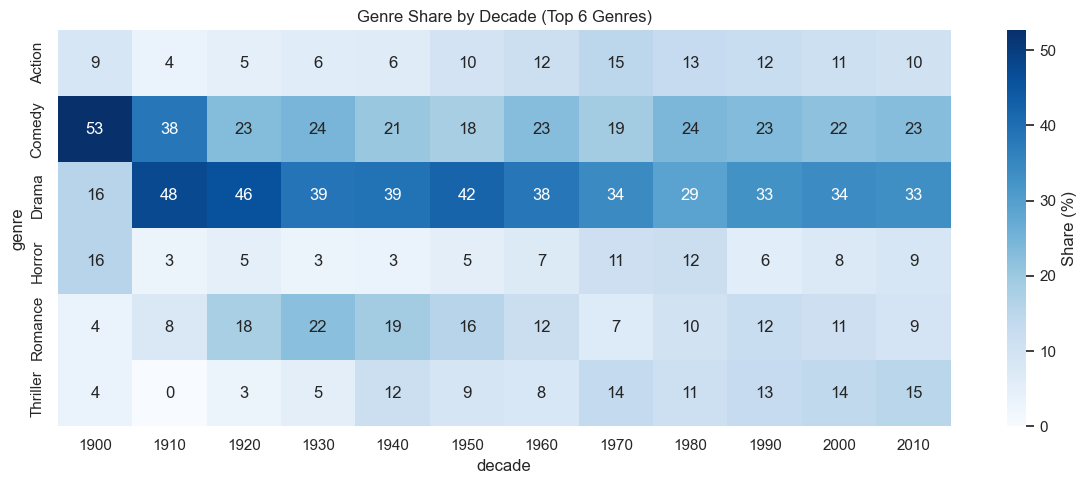

Top genre per decade (among top-6 set):


,decade,genres_list,share_%
1,1900,Comedy,52.6
8,1910,Drama,47.6
13,1920,Drama,45.9
19,1930,Drama,38.8
25,1940,Drama,39.2
31,1950,Drama,42.0
37,1960,Drama,38.1
43,1970,Drama,34.3
49,1980,Drama,29.0
55,1990,Drama,32.8


In [30]:
"""
Genre mix over time: explode genres, compute within-decade shares, and visualize.

Purpose:
- Examine how the distribution of the most common genres changes by decade.
- Compute (decade, genre) movie counts, focus on the overall top 6 genres,
  convert counts to within-decade shares, and plot a heatmap.

Inputs:
- movies_merged with columns: decade, title, genres_list

Outputs:
- Heatmap figure: "Genre Share by Decade (Top 6 Genres)"
- Table: top genre per decade with share (%)

Notes:
- Using shares (composition) rather than raw counts controls for changing output volume.
- Filter decades with ≥50 movies to reduce small-sample noise.
"""

# Expand to one row per (movie, genre)
genres_exploded = movies_merged.explode('genres_list')

# Count movies by (decade, genre)
genre_counts = (
    genres_exploded
      .dropna(subset=['decade','genres_list'])
      .groupby(['decade','genres_list'])
      .size()
      .reset_index(name='movie_count')
)

# Compute decade sizes and keep well-represented decades (≥50 movies)
decade_sizes = (
    movies_merged.dropna(subset=['decade'])
    .groupby('decade')['title'].count()
    .rename('num_movies')
    .reset_index()
)
valid_decades = decade_sizes.query("num_movies >= 50")['decade']

genre_counts = genre_counts[genre_counts['decade'].isin(valid_decades)]

# Identify the overall top 6 genres across all decades
top_genres = (
    genre_counts.groupby('genres_list')['movie_count']
    .sum().nlargest(6).index
)
top_genre_counts = genre_counts[genre_counts['genres_list'].isin(top_genres)]

# Convert counts to within-decade shares for the top-6 set
totals = (
    top_genre_counts.groupby('decade')['movie_count'].sum()
    .rename('total_in_top').reset_index()
)
gc = top_genre_counts.merge(totals, on='decade', how='left')
gc['share'] = gc['movie_count'] / gc['total_in_top'] 

# Prepare for plotting: order decades and pivot to wide
gc = gc.sort_values('decade')
gc['decade_str'] = gc['decade'].astype(int).astype(str)
heat = gc.pivot(index='genres_list', columns='decade_str', values='share').fillna(0)

# Heatmap of genre composition by decade (Top 6 only)
plt.figure(figsize=(12,5))
ax = sns.heatmap(heat*100, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Share (%)'})
plt.title('Genre Share by Decade (Top 6 Genres)')
plt.xlabel('decade'); plt.ylabel('genre')
plt.tight_layout()
plt.show()

# Report the leading genre per decade within the top-6 set
top_per_decade = (
    gc.loc[gc.groupby('decade')['share'].idxmax(), ['decade','genres_list','share']]
    .sort_values('decade')
)
print("Top genre per decade (among top-6 set):")
display(top_per_decade.assign(share=lambda d: (d['share']*100).round(1)).rename(columns={'share':'share_%'}))

**Takeaway (Slide 3):** Drama is the dominant genre from the 1910s–2010s, with Action and Thriller expanding their share in modern decades.

# Slide 4 — Genre “Excitement” (Average Rating)

**Question**  
Which genres do audiences rate highest?

**Method**  
- Exploded `genres_list` so each title contributes to all of its genres.  
- Computed the **mean user rating** per genre.  
- Restricted to genres with **≥ 50 movies** to avoid tiny-sample noise.  
- Sorted genres by average rating.

**Plot**  
Horizontal bar chart of **average rating by genre**.

**Findings**  
- **Top-rated genres:** Documentary (3.41), History (3.33), Music (3.23), War (3.22), Drama (3.18).  
- **Middle tier:** Romance, Animation, Crime, Comedy (~3.05–3.15).  
- **Lowest:** Thriller, Action, Sci-Fi, Horror (~2.6–2.9).

**Interpretation / caveats**  
- High ratings ≠ popularity. Some of the most *highly rated* genres (Documentary, History) don’t necessarily drive ticket sales.  
- Genre tags are non-exclusive; many films belong to multiple categories.

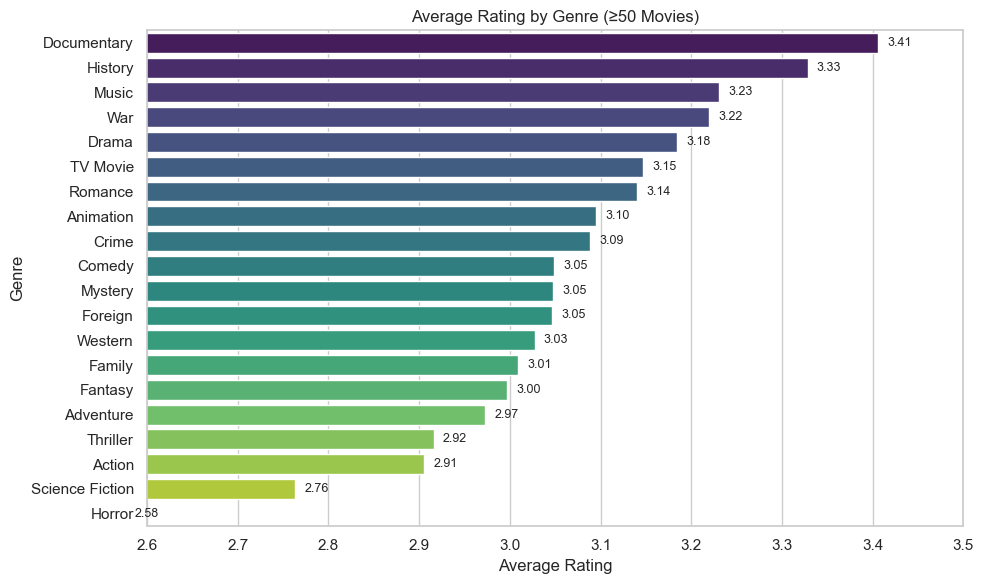

   genres_list  avg_rating  num_movies
0  Documentary    3.406308        3853
1      History    3.328267        1385
2        Music    3.230551        1546
3          War    3.220041        1302
4        Drama    3.184588       19987
5     TV Movie    3.146680         752
6      Romance    3.140338        6615
7    Animation    3.095246        1930
8        Crime    3.088314        4259
9       Comedy    3.048634       12912


In [31]:
"""
Average audience rating by genre (minimum support threshold).

Purpose:
- Estimate which genres tend to receive higher average ratings from users.
- Steps:
  * Use exploded (movie, genre) rows with movie-level avg_rating.
  * Aggregate by genre: mean(avg_rating) and count of contributing movies.
  * Keep genres with sufficient support (≥50 movies) for stability.
  * Visualize as a horizontal bar chart with value labels.

Inputs:
- genres_exploded with columns: genres_list, avg_rating, title

Outputs:
- Bar chart: "Average Rating by Genre (≥50 Movies)"
- Printed table of the top genres by average rating

Notes:
- This is an unweighted mean of per-movie averages within each genre.
  With more time, consider weighting by `num_ratings` to reduce noise.
"""

# Aggregate movie-level ratings by genre
genre_ratings = (
    genres_exploded
      .dropna(subset=['genres_list', 'avg_rating'])
      .groupby('genres_list')
      .agg(
          avg_rating=('avg_rating','mean'),
          num_movies=('title','count')
      )
      .reset_index()
)

# Keep well-represented genres and order by average rating
genre_ratings_filtered = (
    genre_ratings
    .query("num_movies >= 50")
    .sort_values('avg_rating', ascending=False)
    .reset_index(drop=True)
)

# Horizontal bar plot of average rating by genre
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=genre_ratings_filtered,
    x='avg_rating',
    y='genres_list',
    hue='genres_list',                  # separate colors by genre for readability   
    palette='viridis',
    legend=False
)

ax.set_title('Average Rating by Genre (≥50 Movies)')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genre')
ax.set_xlim(2.6, 3.5)                   # tighten to highlight variation in means  

# Add value labels at bar ends
for p, v in zip(ax.patches, genre_ratings_filtered['avg_rating']):
    ax.text(p.get_width() + 0.01, p.get_y() + p.get_height()/2,
            f"{v:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Preview the top genres
print(genre_ratings_filtered.head(10))

**Takeaway (Slide 4):**  
Audiences consistently rate **Documentary/History/Music/War** highest, while **Horror, Sci-Fi, and Action** score lowest—highlighting that critical acclaim does not always align with box office appeal.

# Slide 5 — Blockbuster Popularity  

**Question**  
Which movies captured the most audience attention (most ratings)?  

**Method**  
- Filtered movies with at least 1,000 ratings.  
- Sorted by **number of ratings** (audience activity).  
- Selected the **Top 10 most-rated movies**.  
- Annotated each bar with its **average rating** for context.  

**Plot**  
Horizontal bar chart: **Number of Ratings** (audience size), with average rating shown beside each title.  

**Findings**  
- 1990s movies dominate the list (*Forrest Gump, Shawshank Redemption, Pulp Fiction, The Matrix, Braveheart, Toy Story*).  
- Many of these blockbusters combine **huge audience attention and high ratings** (e.g., *Shawshank* 4.43, *Pulp Fiction* 4.17).  
- Some titles show a gap: *Jurassic Park* drew massive attention but a lower average rating (3.66).  

**Takeaway**  
Blockbusters with cultural impact—especially 1990s classics—drew the largest audiences, often pairing wide reach with critical acclaim.  

,title,year,avg_rating,num_ratings
351,Forrest Gump,1994,4.052926,91921.0
314,The Shawshank Redemption,1994,4.429015,91082.0
292,Pulp Fiction,1994,4.169975,87901.0
586,The Silence of the Lambs,1991,4.152246,84078.0
2456,The Matrix,1999,4.154098,77960.0
256,Star Wars,1977,4.132299,77045.0
475,Jurassic Park,1993,3.660238,74355.0
522,Schindler's List,1993,4.266531,67662.0
108,Braveheart,1995,4.016057,66512.0
0,Toy Story,1995,3.888157,66008.0


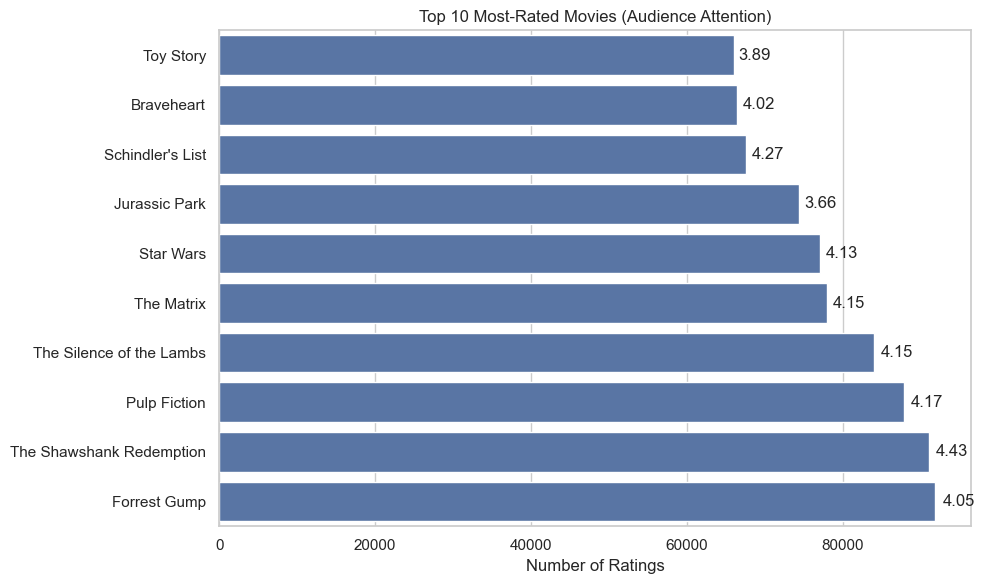

In [32]:
"""
Most-rated movies: identify and visualize top audience attention.

Purpose:
- Find the movies with the highest number of user ratings (proxy for attention/visibility).
- Apply a filter of ≥1000 ratings to focus on well-known/popular films.
- Sort by num_ratings (descending) and display the top 10.
- Visualize with a horizontal bar chart, annotating average ratings.

Inputs:
- movies_merged with columns: title, year, avg_rating, num_ratings

Outputs:
- Table of top 10 most-rated movies (title, year, avg_rating, num_ratings)
- Bar chart: "Top 10 Most-Rated Movies (Audience Attention)"

Notes:
- num_ratings captures *volume of engagement*, not sentiment.
- Annotating avg_rating on bars shows how popularity relates to perceived quality.
"""

# Select top 10 most-rated movies (filter for stable averages)
top = (movies_merged
       .dropna(subset=['num_ratings'])
       .query('num_ratings >= 1000')  
       .sort_values('num_ratings', ascending=False)
       .loc[:, ['title','year','avg_rating','num_ratings']]
       .head(10))

# Display table of results
display(top)

# Horizontal bar chart (reversed order so most-rated is at bottom)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top.iloc[::-1], y='title', x='num_ratings')
plt.title('Top 10 Most-Rated Movies (Audience Attention)')
plt.xlabel('Number of Ratings')
plt.ylabel('')

# Annotate bars with average rating
for y, (_, row) in enumerate(top.iloc[::-1].iterrows()):
    ax.text(row['num_ratings']*1.01, y, f"{row['avg_rating']:.2f}", va='center')

plt.tight_layout()
plt.show()

**Takeaway (Slide 5):**  
Blockbusters dominate audience attention — *Forrest Gump*, *Shawshank Redemption*, *Pulp Fiction*, and *Star Wars* each drew 60k–90k+ ratings.  
These films not only attracted huge engagement but also scored highly (avg ratings often >4.0), reinforcing that big-budget or franchise titles command the spotlight.

# Slide 6 — Ratings vs Profitability (ROI)

**Question**  
Do more profitable movies (higher ROI) also receive higher audience ratings?

**Method**  
- Computed ROI = `revenue / budget`.  
- Dropped movies with missing values.  
- Scatterplot: each dot = one movie (ROI vs avg rating).  
- Red line = regression trend line.  
- Also computed correlation coefficient.

**Plot**  
- X-axis: ROI (Revenue / Budget).  
- Y-axis: Average audience rating.  
- Red line shows trend.

**Findings**  
- Correlation between ROI and rating ≈ **0.01** → essentially no relationship.  
- Highly profitable films are **not consistently higher rated**.  
- Audience appreciation (ratings) and profitability are driven by different factors.

**Takeaway**  
Profitability ≠ Quality.  
Scheduling should balance **audience favorites (ratings)** with **revenue drivers (ROI)** — they don’t always overlap.

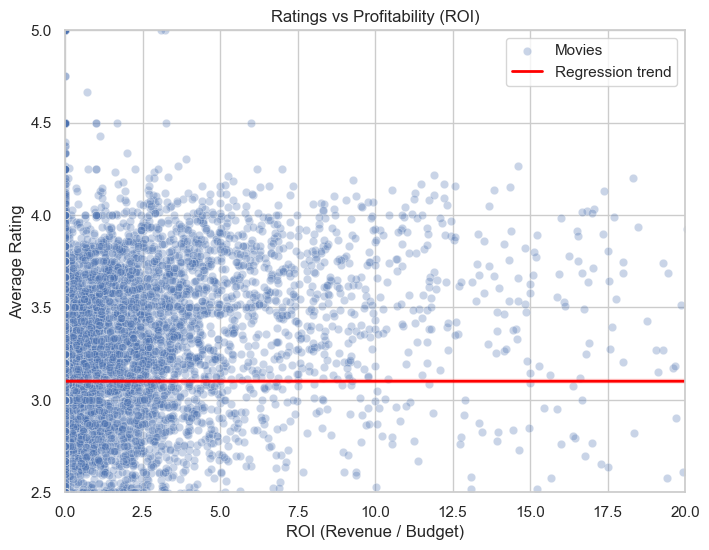

Correlation between ROI and Avg Rating: 0.01


In [33]:
"""
Relationship between profitability (ROI) and audience ratings.

Purpose:
- Test whether more profitable movies (high ROI) also tend to receive higher ratings.
- Build a scatterplot of ROI vs avg_rating.
- Overlay a regression trendline for visual correlation.
- Restrict x-axis (ROI) to [0, 20] to avoid distortion from extreme outliers.
- Compute Pearson correlation between ROI and avg_rating.

Inputs:
- movies_merged with columns: roi, avg_rating

Outputs:
- Scatter + regression plot: "Ratings vs Profitability (ROI)"
- Console output: correlation coefficient between ROI and avg_rating

Notes:
- ROI = revenue / budget, so very large values often come from low-budget films.
- Filtering/limiting axes prevents outliers from dominating the chart.
- Correlation is descriptive; doesn’t imply causation.
"""

# Filter rows with valid ROI and rating
roi_data = movies_merged.dropna(subset=['roi','avg_rating'])

plt.figure(figsize=(8,6))

# Scatterplot of individual movies
sns.scatterplot(data=roi_data, x='roi', y='avg_rating', alpha=0.3, label='Movies')

# Add regression line (no scatter points)
sns.regplot(
    data=roi_data, x='roi', y='avg_rating',
    scatter=False, color='red', line_kws={'lw':2}, label='Regression trend'
)

# Axis limits for readability
plt.xlim(0, 20)  
plt.ylim(2.5, 5)
plt.title('Ratings vs Profitability (ROI)')
plt.xlabel('ROI (Revenue / Budget)')
plt.ylabel('Average Rating')
plt.legend()   

plt.show()

# Correlation between ROI and ratings
corr = roi_data['roi'].corr(roi_data['avg_rating'])
print(f"Correlation between ROI and Avg Rating: {corr:.2f}")

**Takeaway (Slide 6):** Profitability and ratings are uncorrelated (corr ≈ 0.01).  
A blockbuster ROI doesn’t guarantee higher ratings.

# Slide 7 — Conclusion & Recommendations  

**What we learned**  
- **Audience ratings** are remarkably stable (~3.0–3.3) across decades.  
- **Engagement (ratings volume)** has skyrocketed since the 1990s.  
- **Drama** is the most consistent genre over time, while **Action/Thriller** rise sharply in modern decades.  
- **Documentary, History, and Music** genres earn the *highest ratings* (quality), though they are niche.  
- **Blockbusters (Toy Story, Shawshank, Star Wars, etc.)** attract huge attention, blending popularity and high ratings.  
- **Profitability and ratings are uncorrelated** (corr ≈ 0.01) → financial success doesn’t guarantee audience love.  

**Recommendations for scheduling**  
- **Anchor with Drama** — reliable across eras, broad audience appeal.  
- **Leverage Action/Thriller in peak slots** — strong modern popularity.  
- **Mix in high-rated niche genres (Documentary/History)** for prestige and differentiation.  
- **Don’t rely solely on ROI** — focus on balance: audience excitement + box office draw.  

**Next steps (if more time)**  
- Segment audiences (by age, region) to see how preferences differ.  
- Explore how genre trends shift over time (e.g., horror booms, superhero waves).
- Connect ratings with revenue directly for targeted ROI analysis.  